### **Loading the Dataset**
This code loads the dataset from the CSV file and displays basic information about it.

# Importing libraries

In [42]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import os

In [43]:
# Load dataset
file_path = "data.csv"
df = pd.read_csv(file_path)
df['open_dt'] = pd.to_datetime(df['open_dt'], errors='coerce')
df = df.dropna(subset=['latitude', 'longitude'])


In [44]:
# Filter for animal-related cases
animal_keywords = ['animal', 'dog', 'cat', 'wildlife', 'bite']
df_animal = df[df['type'].str.lower().str.contains('|'.join(animal_keywords), na=False)]

In [45]:
# Create output folder
output_folder = "animal_case_plots"
os.makedirs(output_folder, exist_ok=True)

# Set up seaborn style
sns.set(style="whitegrid")


In [46]:
# Plot 1: Case Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_animal, x='case_status', order=df_animal['case_status'].value_counts().index)
plt.title("Animal-Related Case Status Distribution")
plt.xlabel("Case Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{output_folder}/case_status_distribution.png")
plt.close()


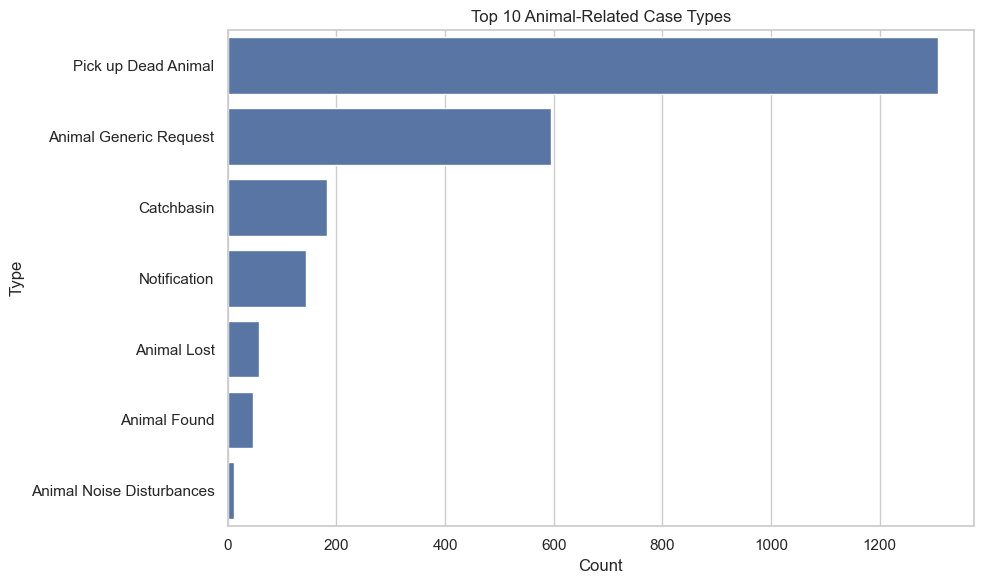

In [39]:
plt.figure(figsize=(10, 6))
top_types = df_animal['type'].value_counts().nlargest(10)
sns.barplot(x=top_types.values, y=top_types.index)
plt.title("Top 10 Animal-Related Case Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

In [54]:
# Plot 3: Cases Over Time
df_animal['date'] = df_animal['open_dt'].dt.date
cases_over_time = df_animal['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
cases_over_time.plot()
plt.title("Animal-Related Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.savefig(f"{output_folder}/cases_over_time.png")
plt.close()


In [51]:

# Plot 4: Cases by Department
plt.figure(figsize=(10, 6))
top_depts = df_animal['department'].value_counts().nlargest(10)
sns.barplot(x=top_depts.values, y=top_depts.index)
plt.title("Top Departments Handling Animal-Related Cases")
plt.xlabel("Count")
plt.ylabel("Department")
plt.tight_layout()
plt.savefig(f"{output_folder}/cases_by_department.png")
plt.close()



In [52]:
# Plot 5: Cases by Neighborhood
plt.figure(figsize=(10, 6))
top_neighborhoods = df_animal['neighborhood'].value_counts().nlargest(10)
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index)
plt.title("Top Neighborhoods for Animal-Related Cases")
plt.xlabel("Count")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.savefig(f"{output_folder}/cases_by_neighborhood.png")
plt.close()

print(f"✅ All plots saved in the folder: {output_folder}")

✅ All plots saved in the folder: animal_case_plots
